<a href="https://colab.research.google.com/github/iannstronaut/PCVK_Ganjil_24-25/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Praktikum

## Membuat Gama Correction

Melakukan import library yang dibutuhkan

In [11]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from PIL import Image
import pylab as plt
import glob


Membuat fungsi Adjust Gamma

In [2]:
def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

Meminta Input dari User

In [3]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


Melakukan Gamma Correction pada gambar dengan inputan dari user

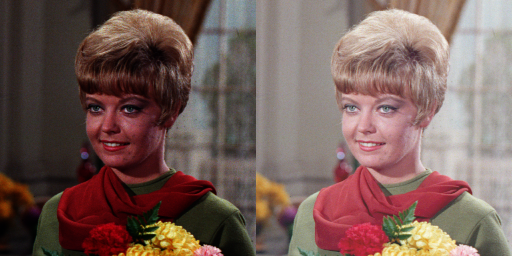

In [4]:
img = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')

adjusted_image = adjust_gamma(img, gamma)

finalImg = cv2.hconcat([img, adjusted_image])
cv2_imshow(finalImg)

## Simulasi Image Depth

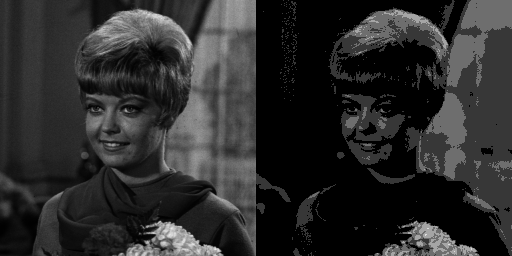

In [10]:
bitdepth = 2

level = (225 / (2 ** bitdepth)-1)
img2 =  cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff', cv2.IMREAD_GRAYSCALE)
depth_image = np.zeros(img2.shape, img2.dtype)

for i in range(img2.shape[0]):
  for j in range(img2.shape[1]):
    depth_image[i,j] = (img2[i,j] // level)*level

depthFinal = cv2.hconcat([img2, depth_image])

cv2_imshow(depthFinal)

## Membuat Avarage Denoising

Import semua gambar galaxy yang telah disediakan

In [53]:
imgArr = []
imgGalx = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/galaxy.jpg')
for img in glob.glob('/content/drive/MyDrive/PCVK_MM/Images/noise/*.jpg'):
  n= cv2.imread(img)
  imgArr.append(n)

Lakukan Avarage Denoising

In [54]:
def PNSR(galImgA,galImgB):
  mse = np.mean((galImgA-galImgB)**2)
  if mse == 0:
    return 100
  max_pixel = 255.0
  psnr = 20*np.log10(max_pixel/np.sqrt(mse))
  return psnr

def averageDenoising(index):
  denoisedImage = np.zeros_like(imgArr[0], dtype=np.float32)
  for i in range(index):
    denoisedImage += imgArr[i].astype(np.float32)

  return denoisedImage

Pencatatan Hasil

5 Avarage =  27.537541158728892
10 Avarage =  27.54706624519615


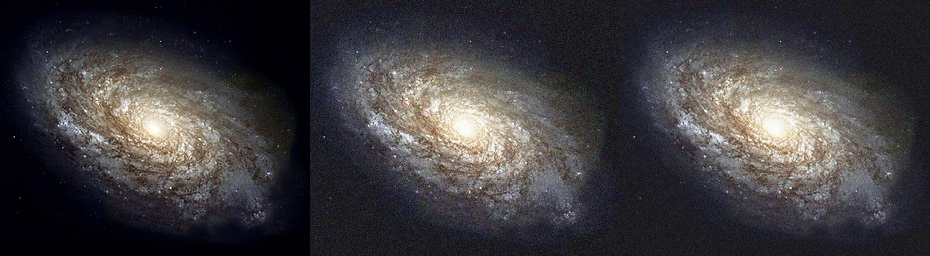

In [55]:
# Denoising 5 Avarage
denoisedImage5 = averageDenoising(5)
denoisedImage5 /= 5
denoisedImage5 = np.uint8(denoisedImage5)
print('5 Avarage = ', PNSR(imgGalx, denoisedImage5))

# Denoising 10 Avarage
denoisedImage10 = averageDenoising(10)
denoisedImage10 /= 10
denoisedImage10 = np.uint8(denoisedImage10)
print('10 Avarage = ', PNSR(imgGalx, denoisedImage10))

finalImg1 = cv2.hconcat([imgGalx, denoisedImage5, denoisedImage10])
cv2_imshow(finalImg1)

20 Avarage =  27.517924034538687
40 Avarage =  27.462846687055556


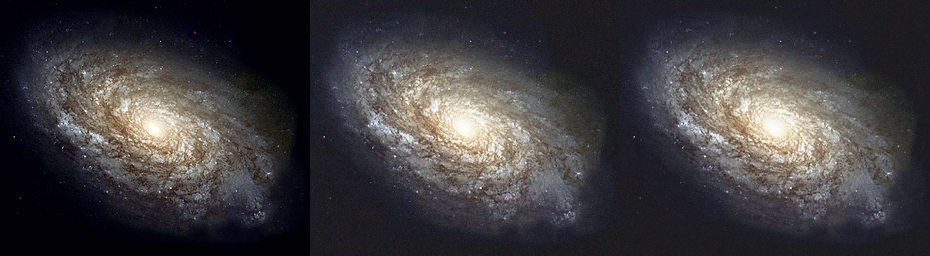

In [56]:
# Denoising 20 Avarage
denoisedImage20 = averageDenoising(20)
denoisedImage20 /= 20
denoisedImage20 = np.uint8(denoisedImage20)
print('20 Avarage = ', PNSR(imgGalx, denoisedImage20))

# Denoising 40 Avarage
denoisedImage40 = averageDenoising(40)
denoisedImage40 /= 40
denoisedImage40 = np.uint8(denoisedImage40)
print('40 Avarage = ', PNSR(imgGalx, denoisedImage40))

finalImg2 = cv2.hconcat([imgGalx, denoisedImage20, denoisedImage40])
cv2_imshow(finalImg2)

80 Avarage =  27.40224544283609
100 Avarage =  27.370931279516654


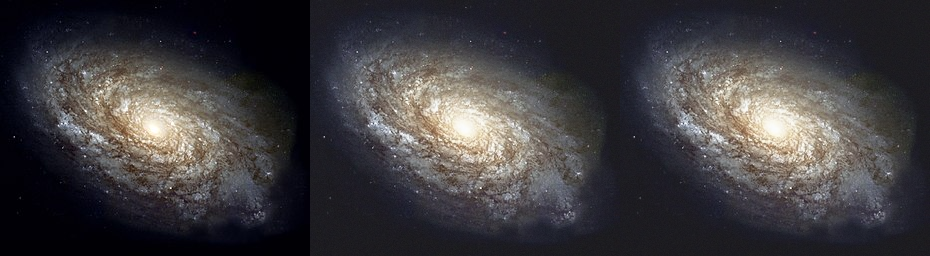

In [57]:
# Denoising 80 Avarage
denoisedImage80 = averageDenoising(80)
denoisedImage80 /= 80
denoisedImage80 = np.uint8(denoisedImage80)
print('80 Avarage = ', PNSR(imgGalx, denoisedImage80))

# Denoising 100 Avarage
denoisedImage100 = averageDenoising(100)
denoisedImage100 /= 100
denoisedImage100 = np.uint8(denoisedImage100)
print('100 Avarage = ', PNSR(imgGalx, denoisedImage100))

finalImg3 = cv2.hconcat([imgGalx, denoisedImage80, denoisedImage100])
cv2_imshow(finalImg3)

Semua Gambar

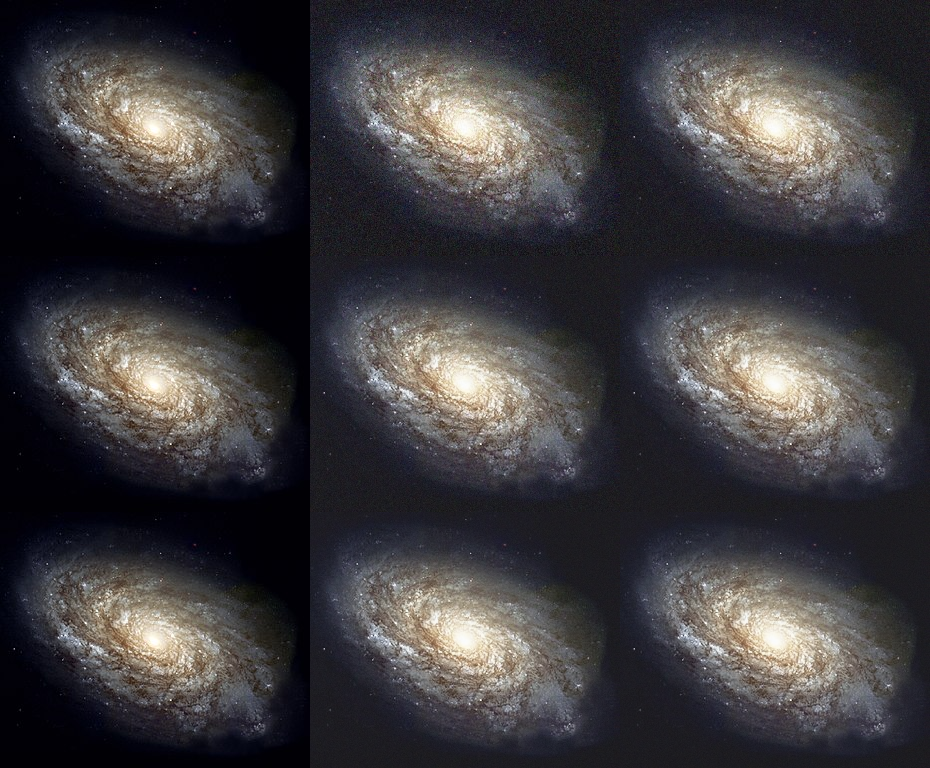

In [58]:
finalImgAll = cv2.vconcat([finalImg1, finalImg2, finalImg3])
cv2_imshow(finalImgAll)

### Kesimpulan
Semakin banyak gambar yang digunakan untuk denoising, PSNR (Peak Signal-to-Noise Ratio) biasanya akan meningkat, yang berarti kualitas gambar setelah denoising akan semakin baik.

## Membuat Image Masking

Import Gambar yang akan di masking

In [35]:
imgCoupl = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/couple.tiff')
mask = np.zeros(imgCoupl.shape[:2], dtype="uint8")

Membuat mask untuk digunakan pada proses masking

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
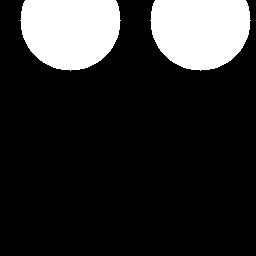

In [36]:
radius = 50
cv2.circle(mask, (200,20), radius, 255, -1)
cv2.circle(mask, (70,20), radius, 255, -1)

Melakukan Masking hanya untuk wajah dari gambar

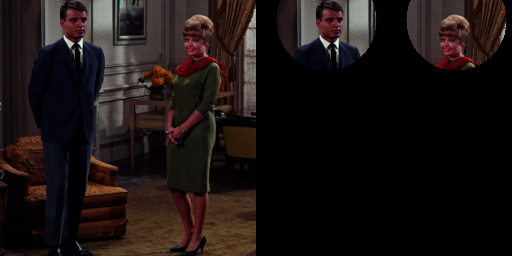

In [37]:
imageMasked = cv2.bitwise_or(imgCoupl, imgCoupl, mask=mask)
finalImgMask = cv2.hconcat([imgCoupl, imageMasked])
cv2_imshow(finalImgMask)

# Tugas

Melakukan percobaan menggunakan operator lain dan tunjukkan hasilnya

## NOT Operator

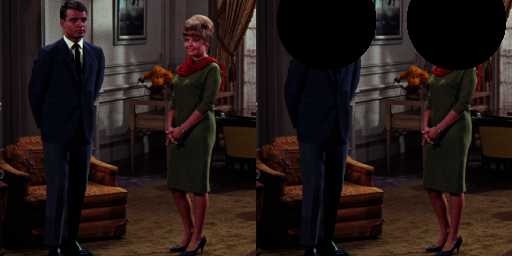

In [39]:
imageMaskedNot = cv2.bitwise_not(mask)
imageMaskedNot = cv2.bitwise_and(imgCoupl, imgCoupl, mask=imageMaskedNot)
finalImgMask = cv2.hconcat([imgCoupl, imageMaskedNot])
cv2_imshow(finalImgMask)

## OR Operator

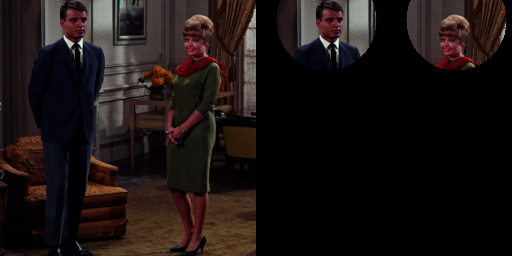

In [46]:
imageMaskedOr = cv2.bitwise_or(imgCoupl, imgCoupl, mask=mask)
finalImgMask = cv2.hconcat([imgCoupl, imageMaskedOr])
cv2_imshow(finalImgMask)

## AND Operator

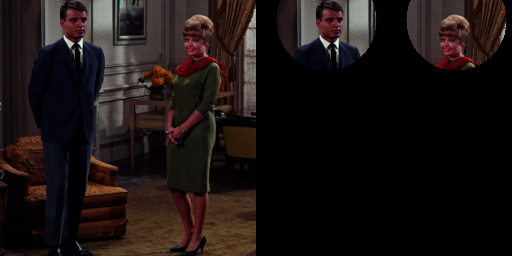

In [47]:
imageMaskedAnd = cv2.bitwise_and(imgCoupl, imgCoupl, mask=mask)
finalImgMask = cv2.hconcat([imgCoupl, imageMaskedAnd])
cv2_imshow(finalImgMask)

## NOT AND Operator

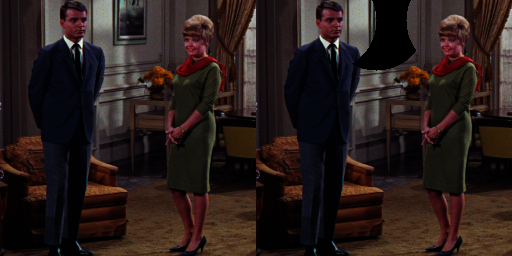

In [42]:
maskNan = np.zeros(imgCoupl.shape[:2], dtype="uint8")
radius = 50
cv2.circle(maskNan, (120,20) , radius, 255, -1)

imageMaskedNaN = cv2.bitwise_or(mask, cv2.bitwise_not(maskNan))
imageMaskedNaN = cv2.bitwise_and(imgCoupl, imgCoupl, mask=imageMaskedNaN)
finalImgMask = cv2.hconcat([imgCoupl, imageMaskedNaN])
cv2_imshow(finalImgMask)

##XOR Operator

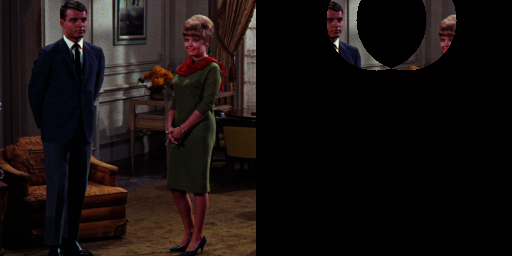

In [51]:
maskXor1 = np.zeros(imgCoupl.shape[:2], dtype="uint8")
maskXor2 = np.zeros(imgCoupl.shape[:2], dtype="uint8")

radius = 50
cv2.circle(maskXor1, (150,20), radius, 255, -1)
cv2.circle(maskXor2, (120,20) , radius, 255, -1)

imageMaskedXor =  cv2.bitwise_xor(maskXor1, maskXor2)
imageMaskedXor = cv2.bitwise_and(imgCoupl, imgCoupl, mask=imageMaskedXor)
finalImgMask = cv2.hconcat([imgCoupl, imageMaskedXor])
cv2_imshow(finalImgMask)